# Getting started with openEO

openEO is an open-source initiative that simplifies accessing and processing Earth Observation (EO) data.

Traditional methods involve complex steps like data discovery, download, and pre-processing, which can be time-consuming and challenging, especially when dealing with multiple datasets. openEO standardises this process, providing a unified interface for accessing and processing diverse EO datasets using familiar programming languages like Python etc. It leverages the concept of datacubes, which streamline the representation and manipulation of EO data, making spatiotemporal analysis more intuitive and efficient.

openEO is used in several applications across a range of EO scenarios, ranging from simple to complex workflows. However, this notebook aims to guide beginners in starting with openEO using the Python client. We'll cover the basics, like installing it, authenticating, finding available EO data, accessing it, and performing basic analysis. We'll also show you how to include some advanced functions that aren't yet part of openEO.

This notebook is compiled using existing examples of openEO; therefore, we recommend exploring the available sample notebooks for more comprehensive explanations. Additionally, for a thorough understanding of various features, we suggest delving into the Eo-college course titled [Cubes&Cloud](https://eo-college.org/courses/cubes-and-clouds/), which provides step-by-step guidance and theoretical explanations. Our focus here is to help users become acquainted with the general openEO workflow.

Additionally, we recommend visiting the official [openEO Python client documentation](https://open-eo.github.io/openeo-python-client/index.html) for more detailed information on the available functions and their usage.

## Installation

The openEO Python client library is available from PyPI and can be easily installed with a tool like **pip**. However, it is preinstalled if you are using Jupyter Workspace, provided by the openEO platform, Copernicus Dataspace Ecosystem, Terrascope, or EOX.

In [2]:
!pip install openeo

You can find additional information on openEO installation in [this page](https://open-eo.github.io/openeo-python-client/installation.html).

In [3]:
import openeo

## Connect and Authenticate

Next, let's set up a connection to an openEO back-end using its connection URL. You can find these URLs for different backends on the [openEO hub](https://hub.openeo.org/). For this notebook, we'll use the Copernicus Data Space Ecosystem, a cloud platform supported by the European Commission, ESA, and Copernicus. Make sure you have an [account](https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/auth?client_id=cdse-public&response_type=code&scope=openid&redirect_uri=https%3A//dataspace.copernicus.eu/account/confirmed/1) to access and process data using openEO.

When using other backends, you can register using your EduGAIN and social logins as suggested [here](https://docs.openeo.cloud/join/free_trial.html).

In [ ]:
connection = openeo.connect(url="openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


You can find additional information on Authentication in [this page](https://open-eo.github.io/openeo-python-client/auth.html).

## Data discovery and access

The Earth observation data is organised in so-called collections. You can programmatically list the collections that are available on a back-end and their metadata using methods on the `connection` object. Furthermore, to visualise available collections and metadata in a user-friendly manner, you can also visit the [openEO hub](https://hub.openeo.org/) or explore [backend specific openEO web editor](https://openeo.dataspace.copernicus.eu/).  

### Data discovery

In [ ]:
# Get all collection ids
connection.list_collection_ids()

['SENTINEL3_OLCI_L1B',
 'SENTINEL3_SLSTR',
 'SENTINEL_5P_L2',
 'SENTINEL2_L1C',
 'SENTINEL2_L2A',
 'SENTINEL1_GRD',
 'COPERNICUS_30',
 'LANDSAT8_L2',
 'SENTINEL3_SLSTR_L2_LST',
 'COPERNICUS_PLANT_PHENOLOGY_INDEX',
 'ESA_WORLDCOVER_10M_2021_V2',
 'COPERNICUS_VEGETATION_INDICES']

In [ ]:
# Get metadata of a single collection
connection.describe_collection("SENTINEL2_L2A")

{'assets': {'thumbnail': {'href': 'https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2022/07/tallinn_estonia/24383281-1-eng-GB/Tallinn_Estonia_pillars.jpg',
   'roles': ['thumbnail'],
   'title': 'Sentinel 2 L2A',
   'type': 'image/png'}},
 'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['B01',
    'B02',
    'B03',
    'B04',
    'B05',
    'B06',
    'B07',
    'B08',
    'B8A',
    'B09',
    'B11',
    'B12',
    'WVP',
    'AOT',
    'SCL',
    'sunAzimuthAngles',
    'sunZenithAngles',
    'viewAzimuthMean',
    'viewZenithMean']},
  't': {'extent': ['2015-07-04T00:00:00Z', None], 'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180, 180],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-56, 83],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'}},
 'description': 'SENTINEL-2 is a wide-swath, high-resolution, multi-spectral imaging mission, supporting Copernicus Land Monitoring studies, including the monitoring of vegetation, soil and water cover, as well as observation of inland waterways and coastal areas. The SENTINEL-2 Multispectral Instrument (MSI) samples 13 spectral bands: four bands at 10 metres, six bands at 20 metres and three bands at 60 metres spatial resolution.\n The level 2A data is atmospherically corrected using Sen2Cor.',
 'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
  'temporal': {'interval': [['2015-07-04T00:00:00Z', None]]}},
 'id': 'SENTINEL2_L2A',
 'keywords': ['COPERNICUS',
  'ESA',
  'Orthoimagery',
  'Sentinel-2',
  'MSI',
  'Level-2A',
  'Radiometry',
  'Plant Resource',
  'TOC'],
 'license': 'proprietary',
 'links': [{'href': 'https://sentinels.copernicus.eu/documents/247904/690755/Sentinel_Data_Legal_Notice',
   'rel': 'license',
   'type': 'application/pdf'},
  {'href': 'https://documentation.dataspace.copernicus.eu/Data/Sentinel2.html',
   'rel': 'alternate',
   'type': 'application/html'},
  {'href': 'https://dataspace.copernicus.eu/browser/?zoom=11&lat=45.36638&lng=12.49832&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2F28b654e7-8912-4e59-9e58-85b58d768b3a&datasetId=S2_L2A_CDAS&fromTime=2023-02-07T00%3A00%3A00.000Z&toTime=

Congrats!!!, you now just did your first real openEO queries to the openEO back-end using the openEO Python client library.

### Process discovery

To proceed, it's important to grasp the available built-in processes of openEO. We've already utilized a few of these processes in our earlier queries, like `list_collection_ids` and `describe_collection`.

In [ ]:
# List all processes
connection.list_processes()

[{'categories': ['arrays'],
  'description': 'Applies a process to each individual value in the array. This is basically what other languages call either a `for each` loop or a `map` function.',
  'id': 'array_apply',
  'parameters': [{'description': 'An array.',
    'name': 'data',
    'schema': {'items': {'description': 'Any data type is allowed.'},
     'type': 'array'}},
   {'description': 'A process that accepts and returns a single value and is applied on each individual value in the array. The process may consist of multiple sub-processes and could, for example, consist of processes such as ``absolute()`` or ``linear_scale_range()``.',
    'name': 'process',
    'schema': {'parameters': [{'description': 'The value of the current element being processed.',
       'name': 'x',
       'schema': {'description': 'Any data type.'}},
      {'description': 'The zero-based index of the current element being processed.',
       'name': 'index',
       'schema': {'minimum': 0, 'type': 'integer'}},
      {'default': None,
       'description': 'The label of the current element being processed. Only populated for labeled arrays.',
       'name': 'label',
       'optional': True,
       'schema': [{'type': 'number'}, {'type': 'string'}, {'type': 'null'}]},
      {'default': None,
       'description': 'Additional data passed by the user.',
       'name': 'context',
       'optional': True,
       'schema': {'description': 'Any data type.'}}],
     'returns': {'description': 'The value to be set in the new array.',
      'schema': {'description': 'Any data type.'}},
     'subtype': 'process-graph',
     'type': 'object'}},
   {'default': None,
    'description': 'Additional data to be passed to the process.',
    'name': 'context',
    'optional': True,
    'schema': {'description': 'Any data type.'}}],
  'returns': {'description': 'An array with the newly computed values. The number of elements are the same as for the original array.',
   'schema': {'items': {'description': 'Any data type is allowed.'},
    'type': 'array'}},
  'summary': 'Apply a process to each array element'},
 {'categories': ['math > trigonometric'],
  'description': 'Computes the arc cosine of `x`. The arc cosine is the inverse function of the cosine so that *`arccos(cos(x)) = x`*.\n\nWorks on radians only.\nThe no-data value `null` is passed through and therefore gets propagated.',
  'examples': [{'arguments': {'x': 1}, 'returns': 0}],
  'id': 'arccos',
  'links': [{'href': 'http://mathworld.wolfram.com/InverseCosine.html',
    'rel': 'about',
    'title': 'Inverse cosine explained by Wolfram MathWorld'}],
  'parameters': [{'description': 'A number.',
    'name': 'x',
    'schema': {'type': ['number', 'null']}}],
  'returns': {'description': 'The computed angle in radians.',
   'schema': {'type': ['number', 'null']}},
  'summary': 'Inverse cosine'},
 {'categories': ['math > trigonometric'],
  'description': 'Computes the inverse hyperbolic cosine of `x`. It is the inverse function of the hyperbolic cosine so that *`arcosh(cosh(x)) = x`*.\n\nWorks on radians only.\nThe no-data value `null` is passed through and therefore gets propagated.',
  'examples': [{'arguments': {'x': 1}, 'returns': 0}],
  'id': 'arcosh',
  'links': [{'href': 'http://mathworld.wolfram.com/InverseHyperbolicCosine.html',
    'rel': 'about',
    'title': 'Inverse hyperbolic cosine explained by Wolfram MathWorld'}],
  'parameters': [{'description': 'A number.',
    'name': 'x',
    'schema': {'type': ['number', 'null']}}],
  'returns': {'description': 'The computed angle in radians.',
   'schema': {'type': ['number', 'null']}},
  'summary': 'Inverse hyperbolic cosine'},
 {'categories': ['math', 'math > exponential & logarithmic'],
  'description': 'Computes the exponentiation for the base `base` raised to the power of `p`.\n\nThe no-data value `null` is passed through and therefore gets propagated if any of the arguments is `null`.',
  'examples': [{'arguments': {'base': 0, 'p': 2}, 'returns':

In [ ]:
connection.describe_process("aggregate_temporal")

{'categories': ['cubes', 'aggregate'],
 'description': 'Computes a temporal aggregation based on an array of temporal intervals.\n\nFor common regular calendar hierarchies such as year, month, week or seasons ``aggregate_temporal_period()`` can be used. Other calendar hierarchies must be transformed into specific intervals by the clients.\n\nFor each interval, all data along the dimension will be passed through the reducer.\n\nThe computed values will be projected to the labels. If no labels are specified, the start of the temporal interval will be used as label for the corresponding values. In case of a conflict (i.e. the user-specified values for the start times of the temporal intervals are not distinct), the user-defined labels must be specified in the parameter `labels` as otherwise a `DistinctDimensionLabelsRequired` exception would be thrown. The number of user-defined labels and the number of intervals need to be equal.\n\nIf the dimension is not set or is set to `null`, the data cube is expected to only have one temporal dimension.',
 'examples': [{'arguments': {'data': {'from_parameter': 'data'},
    'intervals': [['2015-01-01', '2016-01-01'],
     ['2016-01-01', '2017-01-01'],
     ['2017-01-01', '2018-01-01'],
     ['2018-01-01', '2019-01-01'],
     ['2019-01-01', '2020-01-01']],
    'labels': ['2015', '2016', '2017', '2018', '2019'],
    'reducer': {'process_graph': {'mean1': {'arguments': {'data': {'from_parameter': 'data'}},
       'process_id': 'mean',
       'result': True}}}}}],
 'exceptions': {'DimensionNotAvailable': {'message': 'A dimension with the specified name does not exist.'},
  'DistinctDimensionLabelsRequired': {'message': 'The dimension labels have duplicate values. Distinct labels must be specified.'},
  'TemporalExtentEmpty': {'message': 'At least one of the intervals is empty. The second instant in time must always be greater/later than the first instant.'},
  'TooManyDimensions': {'message': 'The data cube contains multiple temporal dimensions. The parameter `dimension` must be specified.'}},
 'id': 'aggregate_temporal',
 'links': [{'href': 'https://openeo.org/documentation/1.0/datacubes.html#aggregate',
   'rel': 'about',
   'title': 'Aggregation explained in the openEO documentation'},
  {'href': 'https://www.rfc-editor.org/rfc/rfc3339.html',
   'rel': 'about',
   'title': 'RFC3339: Details about formatting temporal strings'}],
 'parameters': [{'description': 'A data cube.',
   'name': 'data',
   'schema': {'dimensions': [{'type': 'temporal'}],
    'subtype': 'datacube',
    'type': 'object'}},
  {'description': 'Left-closed temporal intervals, which are allowed to overlap. Each temporal interval in the array has exactly two elements:\n\n1. The first element is the start of the temporal interval. The specified time instant is **included** in the interval.\n2. The second element is the end of the temporal interval. The specified time instant is **excluded** from the interval.\n\nThe second element must always be greater/later than the first element, except when using time without date. Otherwise, a `TemporalExtentEmpty` exception is thrown.',
   'name': 'intervals',
   'schema': {'examples': [[['2015-01-01', '2016-01-01'],
      ['2016-01-01', '2017-01-01'],
      ['2017-01-01', '2018-01-01']],
     [['06:00:00', '18:00:00'], ['18:00:00', '06:00:00']]],
    'items': {'items': {'anyOf': [{'description': 'Date and time with a time zone.',
        'format': 'date-time',
        'subtype': 'date-time',
        'type': 'string'},
       {'description': 'Date only, formatted as `YYYY-MM-DD`. The time zone is UTC. Missing time components are all 0.',
        'format': 'date',
        'subtype': 'date',
        'type': 'string'},
       {'description': 'Time only, formatted as `HH:MM:SS`. The time zone is UTC.',
        'pattern': '^\\d{2}:\\d{2}:\\d{2}$',
        'subtype': 'time',
        'type': 'string'},
       {'type': 'null'}]},
     'maxItems': 2,
     'minItems': 2,
     'subtype': 'temporal

Find more information on these processes in [this page](https://open-eo.github.io/openeo-python-client/processes.html).

### Data access

A common task in earth observation is to apply a formula to a number of spectral bands in order to compute an ‘index’, such as NDVI, NDWI, EVI, … In this tutorial, we’ll go through a couple of steps to extract EVI (enhanced vegetation index) values and timeseries and discuss some openEO concepts along the way.

For calculating the EVI, we need the reflectance of the red, blue and (near) infrared spectral components. These spectral bands are part of the well-known Sentinel-2 data set and are available on the current backend under collection ID SENTINEL2_L2A. so, let's load this collection.

In [ ]:
sentinel2_cube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent={"west": 5.14, "south": 51.17, "east": 5.17, "north": 51.19},
    temporal_extent=["2021-02-01", "2021-04-30"],
    bands=["B02", "B04", "B08"],
)

Here, we use the `load_collection` process that loads a collection from the current back-end by its id. The collection is loaded as a data cube that is restricted by the parameters spatial_extent, temporal_extent, bands, and properties.

Additionally, by filtering as early as possible (directly in `load_collection()` in this case), we ensure the back-end only loads the data we are interested in for better performance and to keep the processing costs low. In this example we are filtering the data based on the spatial extent, temporal extent, and bands.

Furthermore, in this example we implemented bbox for `spatial_extent`, however, user can import their spatial files and feed into the process as a feature collection.

Find out more about data discovery, loading and filtering at [Finding and loading data](https://open-eo.github.io/openeo-python-client/data_access.html).

## Data processing: Calculate EVI


While openEO offers a built-in process for calculating NDVI(`ndvi()`), this capability hasn't been implemented yet for EVI or other indices. Instead, openEO provides support for most other indices through an auxiliary subpackage calle[d Awesome Spectral Indic](https://open-eo.github.io/openeo-python-client/cookbook/spectral_indices.html)es. However, users also have the option to perform band math independently, as demonstrated in this notebook. The choice between the two methods depends on user preference.

From this data cube, we can now select the individual bands using the [`DataCube.band()`](https://open-eo.github.io/openeo-python-client/api.html#openeo.rest.datacube.DataCube) method  and rescale the digital number values to physical reflectances.

In [ ]:
blue = sentinel2_cube.band("B02") * 0.0001
red = sentinel2_cube.band("B04") * 0.0001
nir = sentinel2_cube.band("B08") * 0.0001

We now want to compute the enhanced vegetation index and can do that directly with these band variables:

In [ ]:
evi_cube = 2.5 * (nir - red) / (nir + 6.0 * red - 7.5 * blue + 1.0)

Please note that while this looks like an actual calculation, there is no real data processing going on here. The **evi_cube** object, at this point, is just an abstract representation of our algorithm under construction. The mathematical operators we used here are syntactic sugar for compactly expressing this part of the algorithm.

As an illustration of this, you can also have look at the JSON representation of the algorithm so far, by simply printing them as json: `print(evi_cube.to_json())`

## Execute the process

Depending on the datacube that is created by our process graph and on the later use case, we can export the results to more suitable formats supported by openEO. You can explore the supported file formats in [this page](https://documentation.dataspace.copernicus.eu/APIs/openEO/File_formats.html).

Here, let’s download this as a GeoTIFF file. However, a GeoTIFF does not support a temporal dimension, thus, we first should eliminate it by taking the temporal maximum value for each pixel.

In [ ]:
evi_composite = evi_cube.max_time()

Finally, to trigger an actual execution (on the backend), we have to explicitly send the above representation to the backend. You can do this either synchronously(simple download) or using the batch-job-based method. Most of the simple, basic openEO usage examples show synchronous downloading of results. Synchronous downloads are handy for quick experimentation on small data cubes.

This only works properly if the processing doesn’t take too long and is focused on a smaller area of interest. However, you have to use batch jobs for the heavier work (larger regions of interest, larger time series, more intensive processing).
For more information on using batch-job in openEO, visit [here](https://open-eo.github.io/openeo-python-client/batch_jobs.html).

In [ ]:
evi_composite.download("evi_composite.tiff")

This download command triggers the actual processing on the back-end: it sends the process graph to the back-end and waits for the result.

## Visualise the results

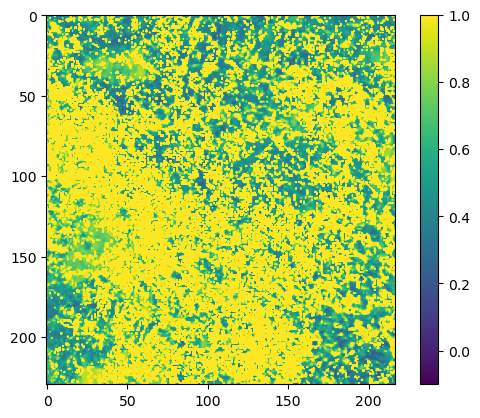

In [ ]:
import rasterio
import matplotlib.pyplot as plt
img2 = rasterio.open("evi_composite.tiff").read()
plt.imshow(img2[0], vmax=1,vmin=-0.1)
plt.colorbar()

When we inspect the downloaded image, we observed a significant impact from cloud-related artefacts on the maximum EVI value. While incorporating a cloud mask could mitigate this issue, our primary objective in this notebook was to introduce the basic task in openEO to the openEO beginners.
Thus, we recommend exploring the cloud mask in [openEO sample notebooks](https://github.com/Open-EO/openeo-community-examples/tree/main/python) for more advanced users.

As we conclude, we encourage further exploration into additional materials for those interested in:

* Applying a cloud mask to enhance the workflow. For guidance, refer to [link](https://open-eo.github.io/openeo-python-client/basics.html#applying-a-cloud-mask).
* Exploring temporal aggregation of the calculated EVI [Link](https://open-eo.github.io/openeo-python-client/basics.html#aggregated-evi-timeseries).
* Utilizing batch-job-based execution [Link](https://github.com/eu-cdse/notebook-samples/blob/main/openeo/Batch_job.ipynb).
* [Examples](https://github.com/eu-cdse/notebook-samples/blob/main/openeo/UDF.ipynb) of including self-defined functions as [user-defined-functions (UDF)](https://open-eo.github.io/openeo-python-client/udf.html) in openEO workflow.
* Learn more on [user-defined-process](https://open-eo.github.io/openeo-python-client/udp.html) to build your own library of reusable algorithms.
* [Examples]((https://github.com/Open-EO/openeo-community-examples/blob/main/python/README.md)) on more comprehensive EO applications, including techniques such as resampling,reduce_dimension, apply_neighborhood and many more.